In [1]:
import os
from google.colab import drive
 
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/machinel_colab'

/content/gdrive/My Drive/machinel_colab


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
##Dropping it since it is not useful
data = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

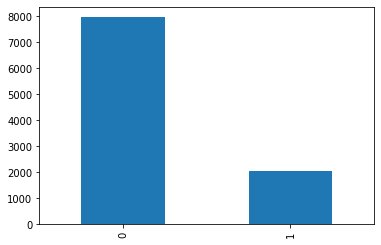

In [7]:
data['Exited'].value_counts().plot(kind='bar')

In [8]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Creating One-Hot-Encoding for geography and Gender

In [9]:
geography = pd.get_dummies(data['Geography'],drop_first=True)

In [10]:
gender = pd.get_dummies(data['Gender'],drop_first=True)

In [11]:
data = data.drop(['Geography','Gender'],axis=1)

In [12]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [13]:
##Concatinating to combine the dataframe
data = pd.concat([data,gender,geography],axis=1)

In [14]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [15]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Male', 'Germany',
       'Spain'],
      dtype='object')

In [16]:
##Just rearanging the columns
data = data[['Male','Spain','Germany','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'
       ]]

In [17]:
data

,Male,Spain,Germany,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,771,39,5,0.00,2,1,0,96270.64,0
9996,1,0,0,516,35,10,57369.61,1,1,1,101699.77,0
9997,0,0,0,709,36,7,0.00,1,0,1,42085.58,1
9998,1,0,1,772,42,3,75075.31,2,1,0,92888.52,1


In [18]:
data.isnull().mean()

Male               0.0
Spain              0.0
Germany            0.0
CreditScore        0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

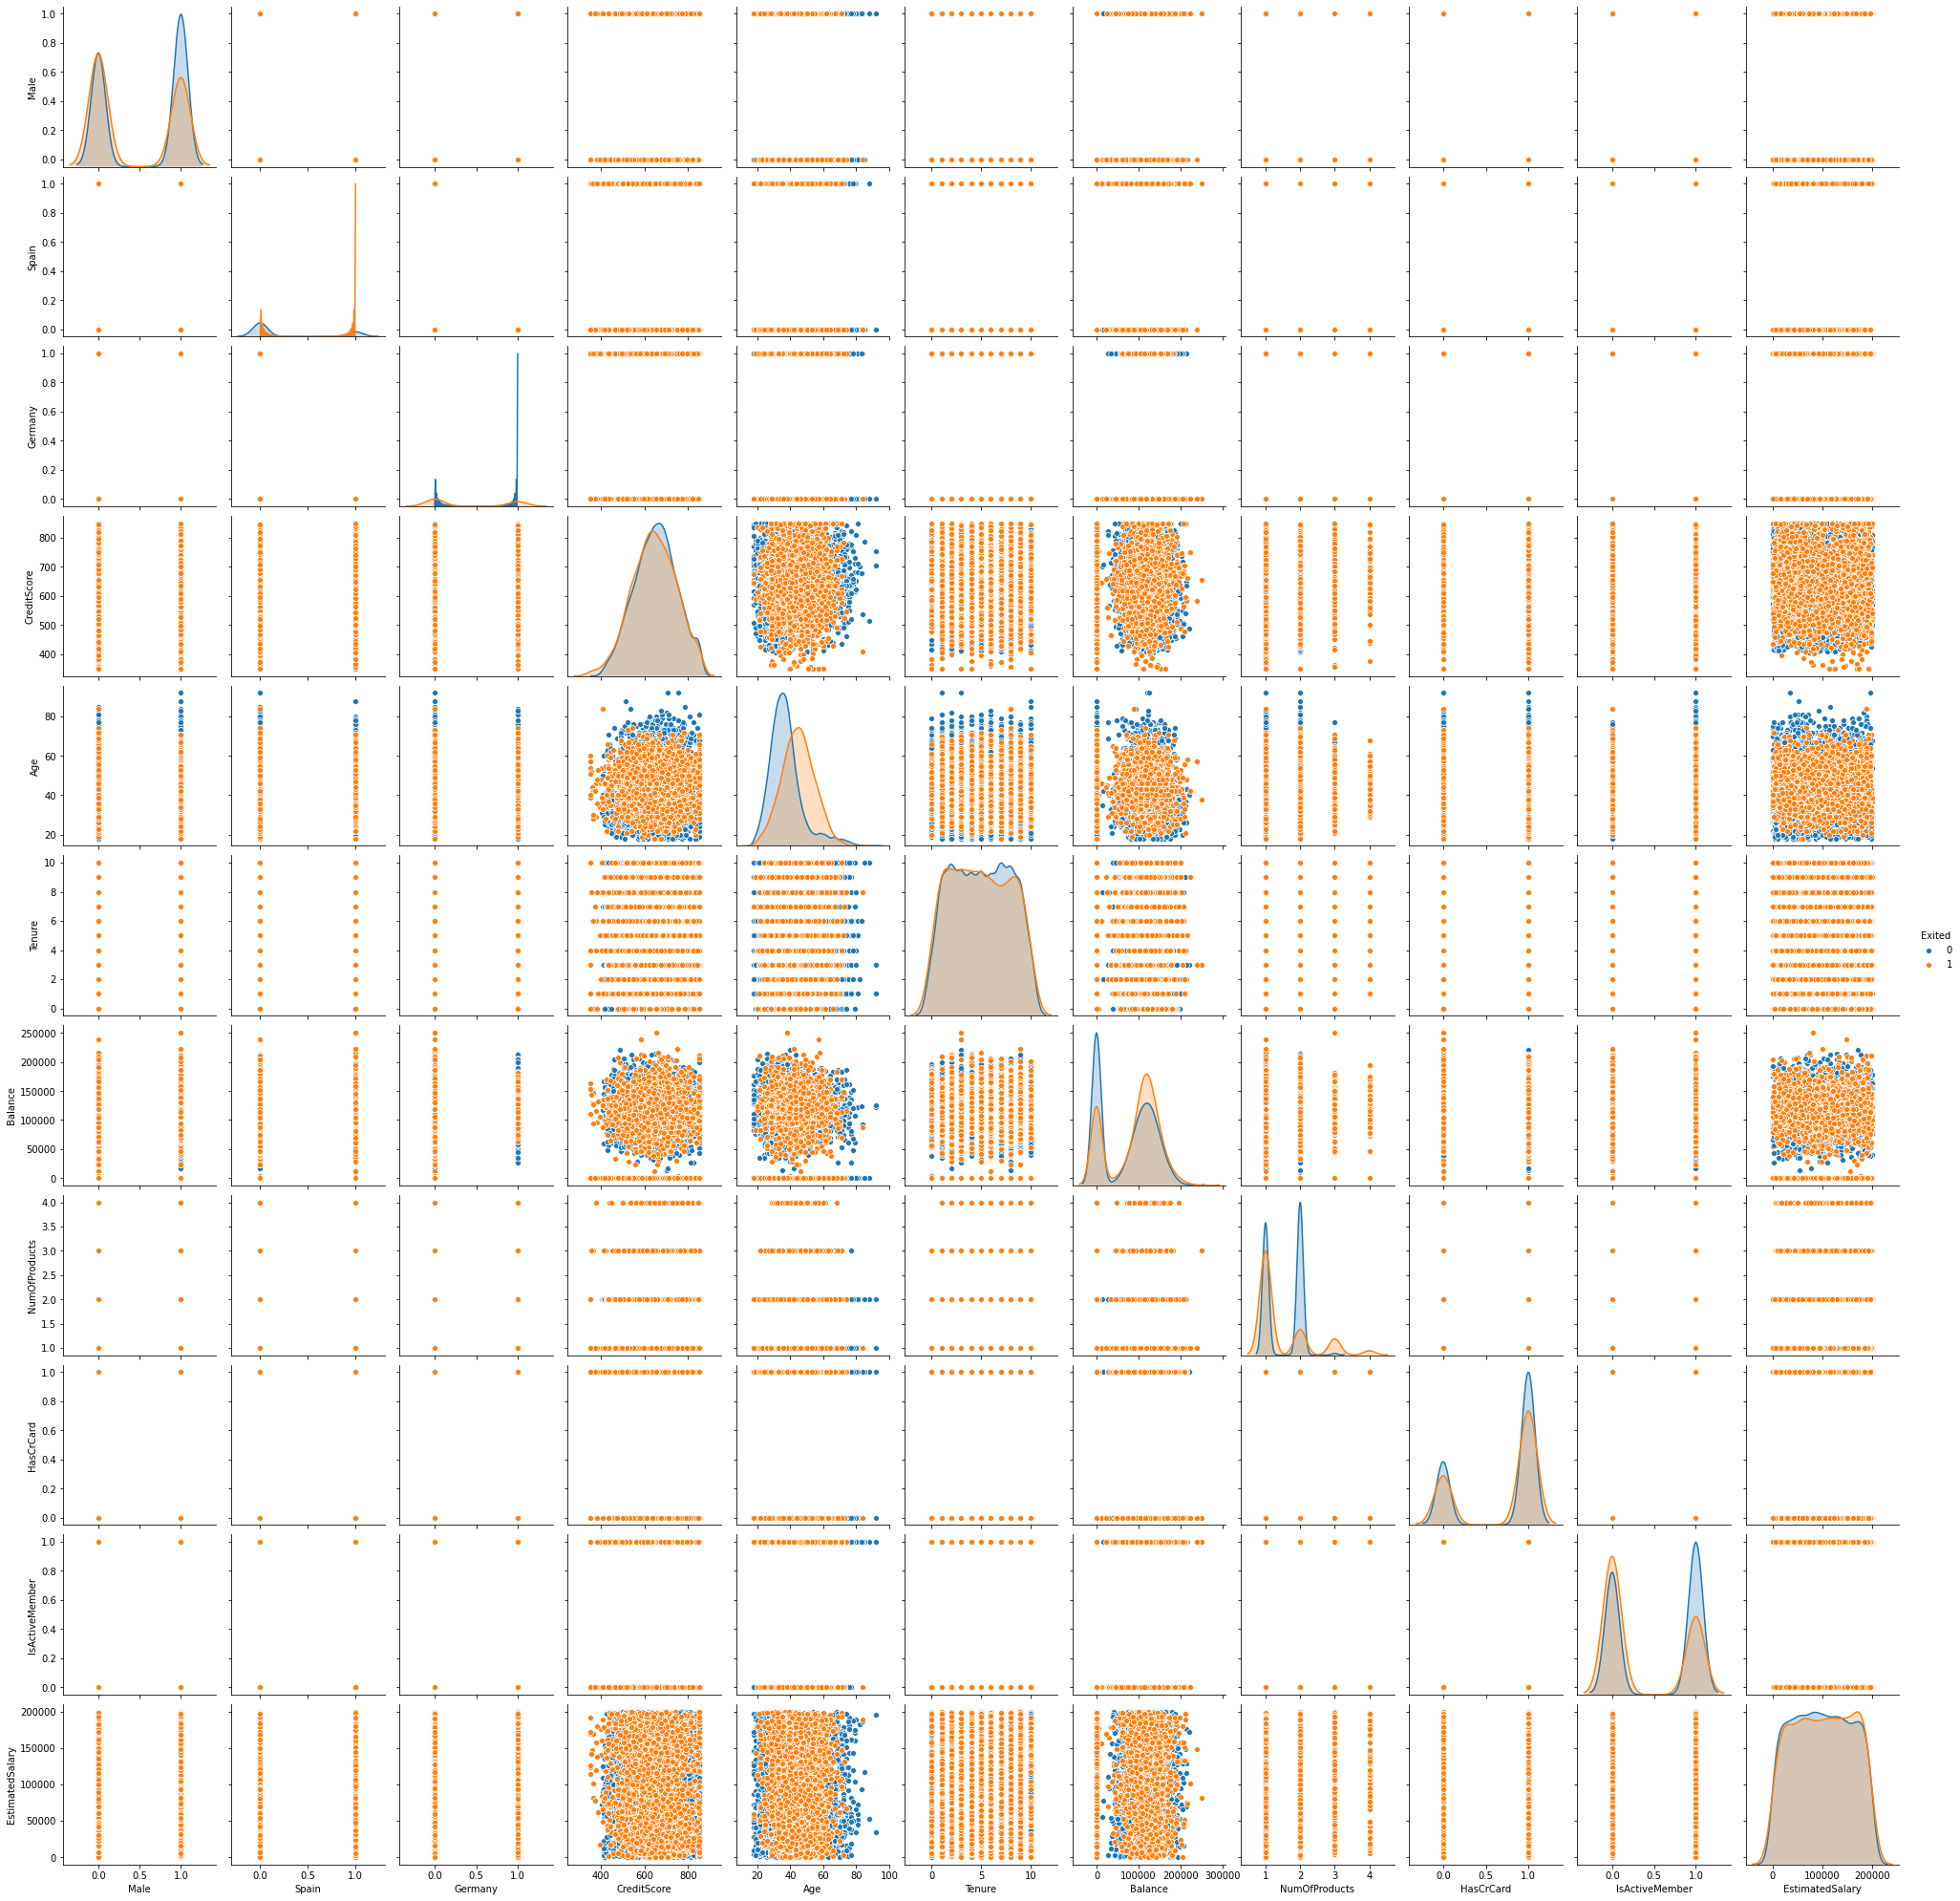

In [19]:
sns.pairplot(data,hue="Exited")

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
et = ExtraTreesRegressor()
et.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

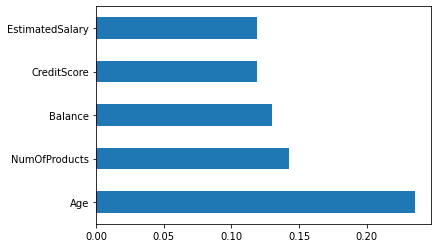

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(et.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
y_train.value_counts()

0    6368
1    1632
Name: Exited, dtype: int64

In [ ]:
##Scaling the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
##Installing keras tuner
pip install keras-tuner

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
import keras

## Performing Hyperparameter using keras tuner

In [ ]:
def build_model(hp):  
  model = keras.Sequential([keras.layers.Dense(input_dim=11,units=hp.Int('dense_1_units', min_value=10, max_value=40, step=8),kernel_initializer=hp.Choice('kernal_init1',values=['he_normal','he_uniform','glorot_normal','glorot_uniform']),activation=hp.Choice('act1',values=['sigmoid','tanh','relu']))
    ,keras.layers.Dense(
        units=hp.Int('dense_2_units', min_value=32, max_value=128, step=16),kernel_initializer=hp.Choice('kernal_init2',values=['he_normal','he_uniform','glorot_normal','glorot_uniform']),activation=hp.Choice('act2',values=['sigmoid','tanh','relu'])),
    keras.layers.Dense(units=1, activation='sigmoid',kernel_initializer=hp.Choice('kernal_init3',values=['he_normal','he_uniform','glorot_normal','glorot_uniform']))
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="churning")

INFO:tensorflow:Reloading Oracle from existing project output/churning/oracle.json
INFO:tensorflow:Reloading Tuner from output/churning/tuner0.json


In [ ]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 34)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 112)               3920      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 113       
Total params: 4,441
Trainable params: 4,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train , epochs=15, validation_split=0.1, initial_epoch=3)

Epoch 4/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8440 - val_loss: 0.3489 - val_accuracy: 0.8512
Epoch 5/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3572 - accuracy: 0.8493 - val_loss: 0.3420 - val_accuracy: 0.8525
Epoch 6/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8550 - val_loss: 0.3382 - val_accuracy: 0.8550
Epoch 7/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8586 - val_loss: 0.3305 - val_accuracy: 0.8575
Epoch 8/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8604 - val_loss: 0.3290 - val_accuracy: 0.8587
Epoch 9/15
225/225 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8597 - val_loss: 0.3291 - val_accuracy: 0.8662
Epoch 10/15
225/225 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8617 - val_loss: 0.3237 - val_accuracy: 0.8675
Epoch

In [ ]:
##Saving the model
model.save('modelann.h5')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_pred[1][0]

0.3090516

In [ ]:
len(y_pred)

2000

In [ ]:
##Making all the values above 0.5 as 1 and below that as 0
def squash(pred):
  for i in range(len(pred)):
    if pred[i][0] > 0.5 :
      pred[i][0] = 1
    else:
      pred[i][0] = 0

In [ ]:
squash(y_pred)

In [ ]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
print(cm)

[[1529   66]
 [ 208  197]]


In [ ]:
print(accuracy)

0.863


In [ ]:
print(roc_auc_score(y_pred,y_test))

0.8146513699814592


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1737
         1.0       0.49      0.75      0.59       263

    accuracy                           0.86      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.90      0.86      0.87      2000

